Question from https://www.kaggle.com/c/dogs-vs-cats/

Solution from https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb

submission in https://www.kaggle.com/c/dogs-vs-cats/submit

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# unzip data and rename

In [ ]:
!unzip /kaggle/input/dogs-vs-cats/train.zip

In [ ]:
!unzip /kaggle/input/dogs-vs-cats/test1.zip

In [ ]:
mv ./test1 ./test

# copy file in order to use generator

In [1]:
import os, shutil
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import optimizers

Using TensorFlow backend.


In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = './train'

# The directory where we will
# store our smaller dataset
base_dir = './cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Fine-tuning

In [4]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [5]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 16s 161ms/step - loss: 0.5351 - acc: 0.7280 - val_loss: 0.3749 - val_acc: 0.8670
Epoch 2/100
100/100 [==============================] - 15s 147ms/step - loss: 0.3735 - acc: 0.8295 - val_loss: 0.3166 - val_acc: 0.8900
Epoch 3/100
100/100 [==============================] - 14s 136ms/step - loss: 0.3086 - acc: 0.8725 - val_loss: 0.3631 - val_acc: 0.8880
Epoch 4/100
100/100 [==============================] - 13s 134ms/step - loss: 0.2883 - acc: 0.8785 - val_loss: 0.0607 - val_acc: 0.9170
Epoch 5/100
100/100 [==============================] - 13s 129ms/step - loss: 0.2676 - acc: 0.8845 - val_loss: 0.3631 - val_acc: 0.8730
Epoch 6/100
100/100 [==============================] - 12s 124ms/step - loss: 0.2432 - acc: 0.8940 - val_loss: 0.1364 - val_acc: 0.9270
Epoch 7/100
100/100 [==============================] - 12s 116ms/step - loss: 0.2523 - acc: 0.8960 - val_loss: 0.0474 - val_acc: 0.9160
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 17s 165ms/step - loss: 0.0496 - acc: 0.9840 - val_loss: 0.2338 - val_acc: 0.9420
Epoch 62/100
100/100 [==============================] - 18s 176ms/step - loss: 0.0439 - acc: 0.9855 - val_loss: 0.0519 - val_acc: 0.9460
Epoch 63/100
100/100 [==============================] - 17s 165ms/step - loss: 0.0403 - acc: 0.9840 - val_loss: 0.4380 - val_acc: 0.9420
Epoch 64/100
100/100 [==============================] - 16s 160ms/step - loss: 0.0511 - acc: 0.9810 - val_loss: 0.3202 - val_acc: 0.9390
Epoch 65/100
100/100 [==============================] - 15s 153ms/step - loss: 0.0380 - acc: 0.9865 - val_loss: 6.3594e-04 - val_acc: 0.9370
Epoch 66/100
100/100 [==============================] - 18s 181ms/step - loss: 0.0421 - acc: 0.9850 - val_loss: 0.5063 - val_acc: 0.9300
Epoch 67/100
100/100 [==============================] - 16s 165ms/step - loss: 0.0357 - acc: 0.9880 - val_loss: 0.5792 - val_acc: 0.9320
Epoch 68/100
100/100 [===============

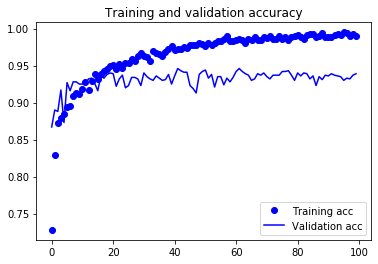

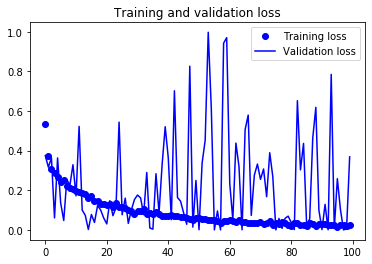

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

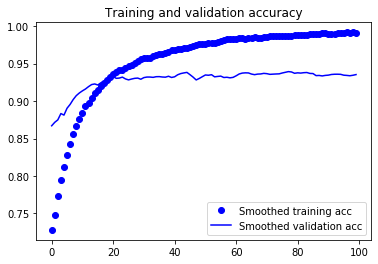

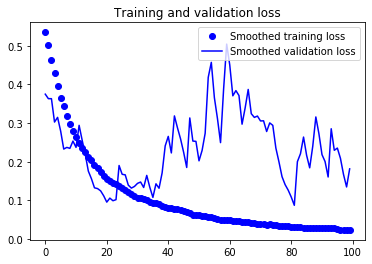

In [10]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9319999814033508


# Predict

In [12]:
predict = model.predict_generator(test_generator, steps=50)

In [13]:
labels = np.round(predict)

In [14]:
import pandas as pd
submission_df  = pd.DataFrame(labels, dtype='int')

In [15]:
submission_df["id"] = submission_df.index + 1
submission_df['label'] = submission_df[0]
submission_df = submission_df.drop(0, axis=1)

In [16]:
submission_df.head()

,id,label
0,1,1
1,2,1
2,3,1
3,4,0
4,5,1


In [17]:
submission_df.to_csv('submission.csv', index=False, header=['id','label'])